In [1]:
#using Revise
addprocs(15)
using VDPTag2, CMDPs
using POMDPs, POMDPToolbox, MCTS
using DataFrames
using Plots; gr()

Plots.GRBackend()

In [2]:
mdp = VDPTagMDP()
b = CBTSDPWBandit(mdp)
solver = ModularSolver(mdp, b)
policy = solve(solver, mdp);

In [3]:
s0 = initial_state(mdp, Base.GLOBAL_RNG)

VDPTag2.TagState([0.0, 0.0], [-3.722, -2.90547])

In [4]:
hr = HistoryRecorder(; max_steps=30, rng=Base.GLOBAL_RNG)
h = simulate(hr, mdp, policy, s0);

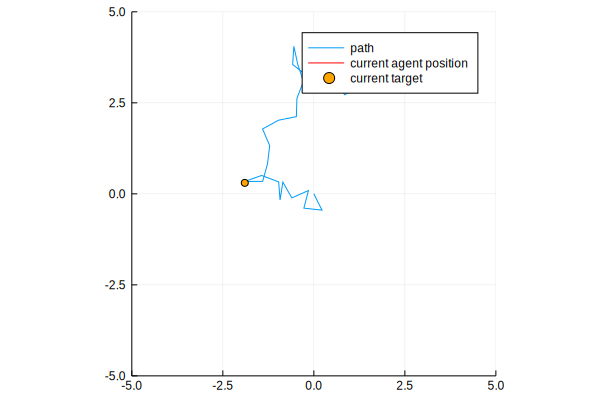

In [5]:
plot(mdp, h)

In [6]:
## Study

In [7]:
study = RewardvsN(VDPTagMDP)
study.n_iters=[10,50,100,200,500,1000]

6-element Array{Int64,1}:
   10
   50
  100
  200
  500
 1000

In [8]:
result = run_study(study)

Elapsed time: 5514.835000038147


CMDPs.RewardvsNResult("VDPTag", 9000×4 DataFrames.DataFrame
│ Row  │ alg           │ seed │ n_iters │ r_total │
├──────┼───────────────┼──────┼─────────┼─────────┤
│ 1    │ DPWBandit     │ 1    │ 10      │ -10.0   │
│ 2    │ DPWBandit     │ 2    │ 10      │ -10.0   │
│ 3    │ DPWBandit     │ 3    │ 10      │ -10.0   │
│ 4    │ DPWBandit     │ 4    │ 10      │ -10.0   │
│ 5    │ DPWBandit     │ 5    │ 10      │ -10.0   │
│ 6    │ DPWBandit     │ 6    │ 10      │ -10.0   │
│ 7    │ DPWBandit     │ 7    │ 10      │ 91.0    │
│ 8    │ DPWBandit     │ 8    │ 10      │ -10.0   │
│ 9    │ DPWBandit     │ 9    │ 10      │ -10.0   │
│ 10   │ DPWBandit     │ 10   │ 10      │ -10.0   │
│ 11   │ DPWBandit     │ 11   │ 10      │ -10.0   │
⋮
│ 8989 │ CBTSDPWBandit │ 489  │ 1000    │ 95.0    │
│ 8990 │ CBTSDPWBandit │ 490  │ 1000    │ 96.0    │
│ 8991 │ CBTSDPWBandit │ 491  │ 1000    │ 92.0    │
│ 8992 │ CBTSDPWBandit │ 492  │ 1000    │ 93.0    │
│ 8993 │ CBTSDPWBandit │ 493  │ 1000    │ 95.0    │
│ 

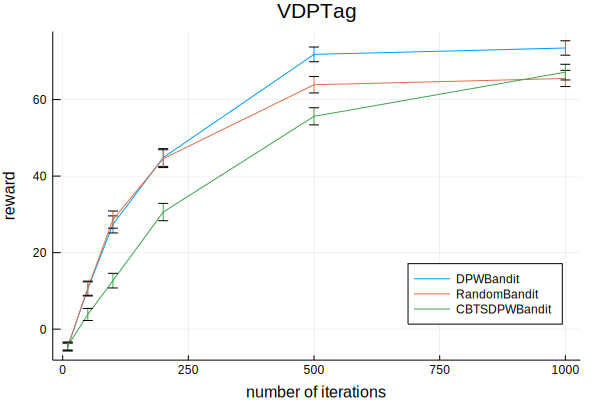

In [9]:
p=plot(result)

In [10]:
savefig(p, "./RvN_vdptag.pdf")